3542
Top1: 356, top2: 606
Top3: 2792
The 3 lines are at positions: (np.int64(356), np.int64(606), np.int64(2792))


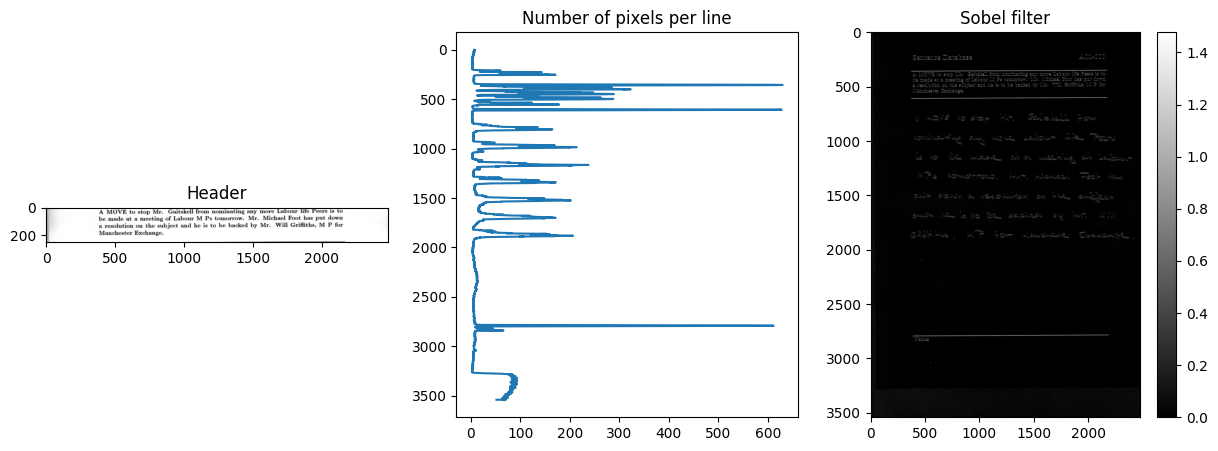

In [5]:
from wsgiref.simple_server import software_version

from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import sobel

def count_pixels_per_line(image):
    """
    Count the number of pixels per line in the image. This is useful to detect the header in the image.
    :param image: The image to count the pixels in.
    :return: An array with the number of pixels per line.
    """
    return np.sum(abs(sobel(image, axis=0)), axis=1)

def separate_header(image):
    """
    Finds the 3 horizontal lines in the image.
    They will allow us to separate the header from the rest of the image, and the rest of the image from the footer, reducing the amount of data to process.
    :param image: The array with the number of pixels per line.
    :return: The 3 largest peaks in the array.
    """
    px_per_line_array = count_pixels_per_line(image)
    
    # Find the 3 largest peaks
    # O(n) solution, since we know we are looking for 3 peaks
    # We know that the first two are in the first half of the image, and the last one is in the second half
    # We also know that the peaks are at least 100 pixels apart
    
    width = 100
    print(len(px_per_line_array))
    header_search_space = px_per_line_array[:(len(px_per_line_array) // 2)]
    top1 = np.argmax(header_search_space)
    y_from = max(0, top1 - width)
    y_to = min(len(header_search_space), top1 + width)
    header_search_space[y_from:y_to] = 0
    top2 = np.argmax(header_search_space)

    footer_search_space = px_per_line_array[(len(px_per_line_array) // 2):]
    top3 = np.argmax(footer_search_space)
    top3 += (len(px_per_line_array) // 2)
    
    # sort the 3 peaks
    top1, top2, top3 = sorted([top1, top2, top3])
    return top1, top2, top3

im = imread("../../data/train/a01-000u.png")

line_positions = separate_header(im)

plt.figure(figsize=(15, 5))
plt.subplot(131)
print("The 3 lines are at positions:", line_positions)
clear_text = im[line_positions[0]:line_positions[1]]
plt.imshow(clear_text, cmap="gray")
plt.title("Header")
plt.subplot(132)
plt.plot(count_pixels_per_line(im), range(im.shape[0]))
# invert the y axis
plt.gca().invert_yaxis()
plt.title("Number of pixels per line")
plt.subplot(133)
plt.imshow(abs(sobel(sobel(im, axis=0), axis=0)), cmap="gray")
plt.colorbar()
plt.title("Sobel filter")
plt.show()




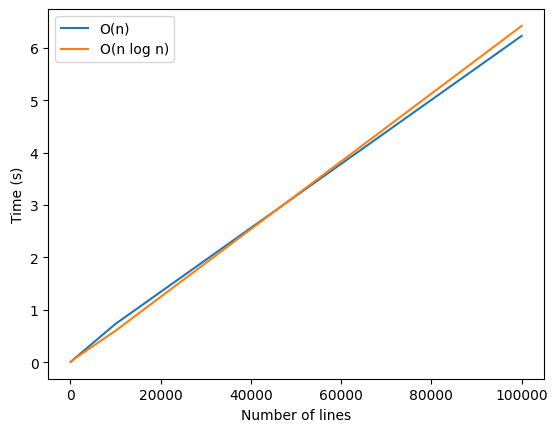

In [41]:
# Complexity demo of the separate_header function

import time

nb_of_lines = [100, 1000, 10000, 100000]
times = []

for lines in nb_of_lines:
    im = np.random.randint(0, 255, (lines, 2500))
    start = time.time()
    separate_header(im)
    end = time.time()
    times.append(end - start)


# Plot the results on the same graph
plt.plot(nb_of_lines, times, label="Mine")
plt.plot(nb_of_lines, times_sort, label="Numpy sort")
plt.xlabel("Number of lines")
plt.ylabel("Time (s)")
plt.legend()
plt.show()
